###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Part B: Linear Regression with Real-World Data (5 Points)

### Wine Quality: target − > quality

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

#### 1. A set of training data Dtrain = ${(x^1, y^1),(x^2, y^2), ...,(x^N, y^N)}$, where $x ∈ R^M, y ∈R$, where N is number of training examples and M is number of features

#### Linear Regression model is given as $\hat{y^n} =  \sum \limits _{m=1} ^{M} {\beta}_{m}x^n_{m} $

#### Least square loss function is given as $l(x,y) =  \sum \limits _{n=1} ^{N} (y^n - \hat{y^n})^2 $


#### Without dropping columns we see that output if Gradient Descent Algorithm is not good

In [2]:
wine_quality=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\winequality-red.csv",delimiter=';')

In [3]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_quality.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [5]:
wine_train=wine_quality.sample(frac=0.8,random_state=200) #random state is a seed value
wine_test=wine_quality.drop(wine_train.index)

In [6]:
X=wine_train.iloc[:,0:11]
y=wine_train.iloc[:,11:]

In [7]:
m=len(y)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

#### Minimize the loss function l(x, y) using Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD algorithms given in the lecture slides). Choose imax between 100 to 1000. Explain your choice [hint: the following plots might be useful in your choice.]


#### You can choose three suitable values of step length α > 0. For each value of step length perform the learning and record
 - In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and (when imax is reached), plot it against iteration number i. Explain the graph.
 - In each iteration step also calculate RMSE on test set RMSE and plot it against iteration number i. Explain the graph.


In [8]:
def minimise_gd(X,y,alpha,beta,imax,epsilon,m):   
    J_history=[]
    abs_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        beta=beta_old-(alpha*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
    return beta,J_history,abs_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

In [9]:
alpha=0.000001
imax=100
epsilon=0.006
beta=np.zeros([12,1])
beta_old=np.zeros([12,1])
print(np.shape(X))
a,b,c=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)

(1279, 12)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[5.62470680e-06]
 [4.69637998e-05]
 [2.93989054e-06]
 [1.54585614e-06]
 [1.41978499e-05]
 [4.82901486e-07]
 [8.86786552e-05]
 [2.57791243e-04]
 [5.60617180e-06]
 [1.86209226e-05]
 [3.71654418e-06]
 [5.90079880e-05]]
[[1.12348552e-05]
 [9.38082187e-05]
 [5.87191132e-06]
 [3.08774463e-06]
 [2.83563654e-05]
 [9.64528138e-07]
 [1.77059583e-04]
 [5.14600458e-04]
 [1.11978316e-05]
 [3.71937221e-05]
 [7.42348445e-06]
 [1.17866141e-04]]
[[1.68304987e-05]
 [1.40533694e-04]
 [8.79609125e-06]
 [4.62568003e-06]
 [4.24756912e-05]
 [1.44488464e-06]
 [2.65143882e-04]
 [7.70431280e-04]
 [1.67750326e-05]
 [5.57185751e-05]
 [1.11208561e-05]
 [1.76575009e-04]]
[[2.24116904e-05]
 [1.87140663e-04]
 [1.17124591e-05]
 [6.15967685e-06]
 [5.65559712e-05]
 [1.92397565e-06]
 [3.52932646e-04]
 [1.02528734e-03]
 [2.23378279e-05]
 [7.41956574e-05]
 [1.48086941e-05]
 [2.35135138e-04]]
[[2.79784834e-05]
 [2.33629558e-04]
 [1.46210436

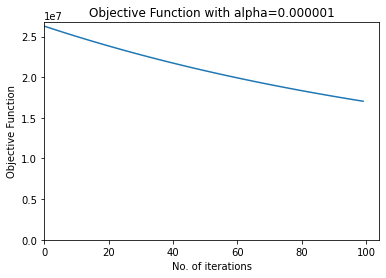

In [10]:
plt.title('Objective Function with alpha=0.000001')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

In [11]:
np.shape(np.reshape(b,[100,1]))

(100, 1)

In [12]:
np.shape(np.reshape(c,[100,1]))

(100, 1)

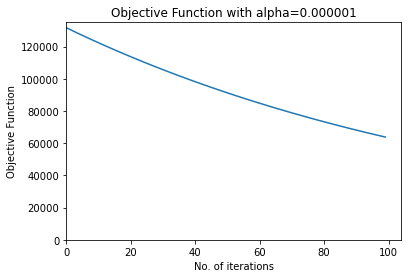

In [13]:
plt.title('Objective Function with alpha=0.000001')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### After dropping columns that have low correlation with Output. Also considering Multicollinearity some attributes are dropped and we have 3 Attributes remaining for prediction of target quality

In [14]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\winequality-red.csv",delimiter=';')

In [15]:
df1=df[["citric acid","sulphates","alcohol","quality"]]

In [16]:
df1.corr()

,citric acid,sulphates,alcohol,quality
citric acid,1.000000,0.312770,0.109903,0.226373
sulphates,0.312770,1.000000,0.093595,0.251397
alcohol,0.109903,0.093595,1.000000,0.476166
quality,0.226373,0.251397,0.476166,1.000000


In [17]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [18]:
X=df_train.iloc[:,0:3]
y=df_train.iloc[:,3:]
X_test=df_test.iloc[:,0:3]
y_test=df_test.iloc[:,3:]
y_test

,quality
0,5
10,5
15,5
17,5
18,4
...,...
1566,6
1569,6
1570,6
1573,6


In [19]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [20]:
def minimise_gd(X,y,alpha,beta,imax,epsilon,m):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        beta=beta_old-(alpha*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

### Step length α = 0.0001

In [25]:
#Case 1 with alpha=0.0001
alpha=0.0001
imax=100
epsilon=0.006
beta=np.zeros([4,1])
beta_old=np.zeros([4,1])
print(np.shape(X))
a,b,c,d=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(1279, 4)
[[0.]
 [0.]
 [0.]
 [0.]]
[[0.00056247]
 [0.00015459]
 [0.00037165]
 [0.0059008 ]]
[[0.00111871]
 [0.00030749]
 [0.00073922]
 [0.01173601]]
[[0.00166879]
 [0.00045872]
 [0.00110273]
 [0.01750636]]
[[0.00221277]
 [0.00060831]
 [0.00146225]
 [0.02321257]]
[[0.00275073]
 [0.00075626]
 [0.00181781]
 [0.02885536]]
[[0.00328272]
 [0.00090261]
 [0.00216946]
 [0.03443543]]
[[0.00380883]
 [0.00104736]
 [0.00251723]
 [0.03995347]]
[[0.00432911]
 [0.00119053]
 [0.00286119]
 [0.04541018]]
[[0.00484362]
 [0.00133215]
 [0.00320135]
 [0.05080623]]
[[0.00535244]
 [0.00147223]
 [0.00353778]
 [0.05614231]]
[[0.00585562]
 [0.00161078]
 [0.00387051]
 [0.06141908]]
[[0.00635323]
 [0.00174782]
 [0.00419957]
 [0.06663719]]
[[0.00684532]
 [0.00188338]
 [0.00452502]
 [0.0717973 ]]
[[0.00733197]
 [0.00201746]
 [0.00484689]
 [0.07690006]]
[[0.00781323]
 [0.00215008]
 [0.00516523]
 [0.0819461 ]]
[[0.00828916]
 [0.00228126]
 [0.00548006]
 [0.08693605]]
[[0.00875982]
 [0.00241102]
 [0.00579144]
 [0.0918705

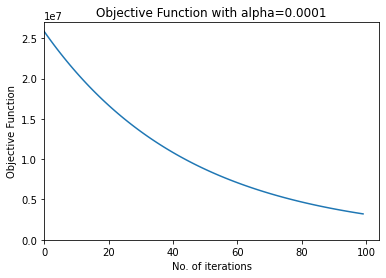

In [33]:
plt.title('Objective Function with alpha=0.0001')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

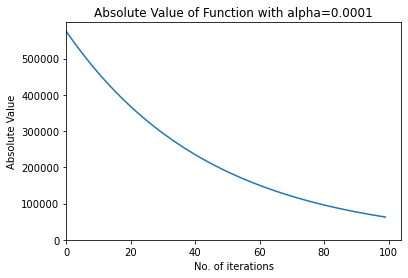

In [27]:
plt.title('Absolute Value of Function with alpha=0.0001')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

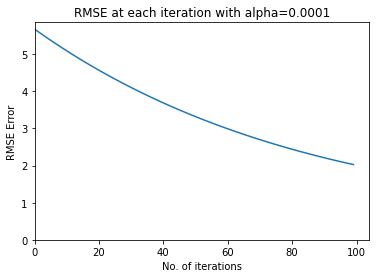

In [28]:
plt.title('RMSE at each iteration with alpha=0.0001')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

### Step length α = 0.0005

In [29]:
#Case 2 with alpha=0.0005
alpha=0.0005
imax=100
epsilon=0.006
beta=np.zeros([4,1])
beta_old=np.zeros([4,1])
print(np.shape(X))
beta_value_2,least_square_function_2,abs_value_function_2,rmse_value_function_2=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",beta_value_2)
print("Function values are",least_square_function_2)
print("Absolute values are",abs_value_function_2)
print("RMSE at each step is",rmse_value_function_2)

(1279, 4)
[[0.]
 [0.]
 [0.]
 [0.]]
[[0.00281235]
 [0.00077293]
 [0.00185827]
 [0.02950399]]
[[0.00546892]
 [0.00150373]
 [0.00361426]
 [0.05736828]]
[[0.00797835]
 [0.00219473]
 [0.00527364]
 [0.08368398]]
[[0.01034882]
 [0.00284816]
 [0.00684179]
 [0.10853715]]
[[0.01258807]
 [0.0034661 ]
 [0.00832377]
 [0.13200907]]
[[0.01470337]
 [0.00405053]
 [0.00972438]
 [0.15417649]]
[[0.01670162]
 [0.0046033 ]
 [0.01104813]
 [0.17511191]]
[[0.01858932]
 [0.00512617]
 [0.0122993 ]
 [0.19488379]]
[[0.02037261]
 [0.0056208 ]
 [0.01348192]
 [0.21355679]]
[[0.0220573 ]
 [0.00608878]
 [0.0145998 ]
 [0.23119197]]
[[0.02364887]
 [0.00653156]
 [0.01565654]
 [0.24784702]]
[[0.02515248]
 [0.00695057]
 [0.01665553]
 [0.26357639]]
[[0.02657304]
 [0.00734711]
 [0.01759999]
 [0.27843153]]
[[0.02791515]
 [0.00772243]
 [0.01849294]
 [0.29246102]]
[[0.02918318]
 [0.00807773]
 [0.01933724]
 [0.30571074]]
[[0.03038123]
 [0.00841409]
 [0.02013561]
 [0.31822402]]
[[0.03151321]
 [0.00873259]
 [0.02089059]
 [0.3300418

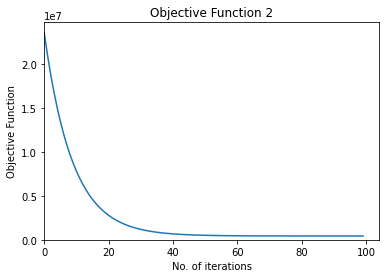

In [30]:
plt.title('Objective Function 2')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(least_square_function_2,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

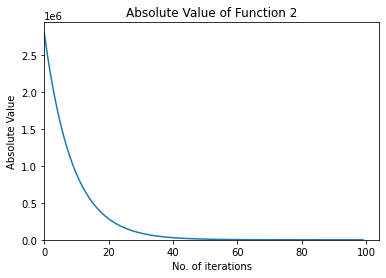

In [31]:
plt.title('Absolute Value of Function 2')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(abs_value_function_2,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

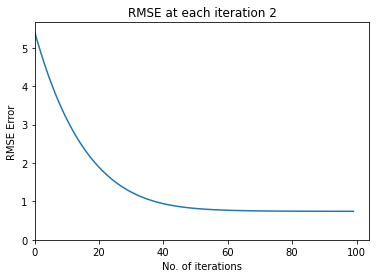

In [32]:
plt.title('RMSE at each iteration 2')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(rmse_value_function_2)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

### Step length α = 0.001

In [34]:
#Case 3 with alpha=0.001
alpha=0.001
imax=100
epsilon=0.006
beta=np.zeros([4,1])
beta_old=np.zeros([4,1])
print(np.shape(X))
beta_value_3,least_square_function_3,abs_value_function_3,rmse_value_function_3=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",beta_value_3)
print("Function values are",least_square_function_3)
print("Absolute values are",abs_value_function_3)
print("RMSE at each step is",rmse_value_function_3)

(1279, 4)
[[0.]
 [0.]
 [0.]
 [0.]]
[[0.00562471]
 [0.00154586]
 [0.00371654]
 [0.05900799]]
[[0.01062626]
 [0.00292319]
 [0.00702394]
 [0.11145715]]
[[0.01507391]
 [0.00415073]
 [0.00996766]
 [0.15807645]]
[[0.01902922]
 [0.00524513]
 [0.01258813]
 [0.19951383]]
[[0.02254691]
 [0.00622118]
 [0.01492127]
 [0.23634523]]
[[0.02567563]
 [0.00709204]
 [0.01699901]
 [0.26908257]]
[[0.0284586 ]
 [0.0078694 ]
 [0.01884975]
 [0.29818088]]
[[0.03093425]
 [0.00856365]
 [0.02049871]
 [0.3240446 ]]
[[0.03313673]
 [0.00918402]
 [0.02196832]
 [0.34703324]]
[[0.03509642]
 [0.00973874]
 [0.0232785 ]
 [0.36746634]]
[[0.03684028]
 [0.01023508]
 [0.02444699]
 [0.38562793]]
[[0.03839231]
 [0.01067955]
 [0.02548953]
 [0.40177048]]
[[0.03977384]
 [0.01107791]
 [0.02642011]
 [0.41611838]]
[[0.0410038 ]
 [0.01143528]
 [0.02725118]
 [0.4288711 ]]
[[0.04209905]
 [0.01175622]
 [0.0279938 ]
 [0.44020593]]
[[0.04307456]
 [0.01204477]
 [0.0286578 ]
 [0.45028045]]
[[0.04394363]
 [0.01230454]
 [0.02925192]
 [0.4592347

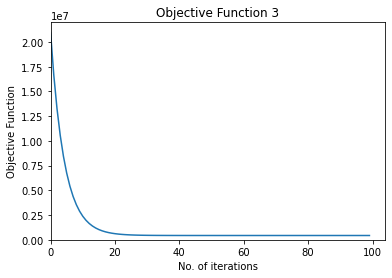

In [35]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(least_square_function_3,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

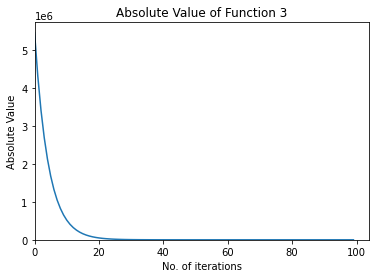

In [36]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(abs_value_function_3,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

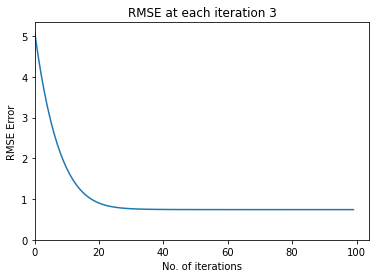

In [37]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(rmse_value_function_3)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

##### In the above graph, we see that initially, the error reduces significantly. But as iterations increase, there is not much reduction seen in the error.

### Exercise 3: Steplength Control for Gradient Descent

#### 1. Steplength-Backtracking as given in lecture slides

In [38]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\winequality-red.csv",delimiter=';')

In [39]:
df1=df[["citric acid","sulphates","alcohol","quality"]]

In [40]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [41]:
X=df_train.iloc[:,0:3]
y=df_train.iloc[:,3:]
X_test=df_test.iloc[:,0:3]
y_test=df_test.iloc[:,3:]
y_test

,quality
0,5
10,5
15,5
17,5
18,4
...,...
1566,6
1569,6
1570,6
1573,6


In [42]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [43]:
def minimise_gd(X,y,beta,imax,epsilon):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        mu=stepsize_backtracking(X,0.1,0.5,beta,temp)
        beta=beta_old-(mu*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

def stepsize_backtracking(X,steepness,reduction_factor,beta,temp):
    mu=1
    while ((least_square_function(X,y,(beta-(1/len(y))*mu*temp))>least_square_function(X, y, beta)-steepness*mu*np.dot(temp.T,temp)).item(0)):
        mu=reduction_factor*mu 
    return mu

In [44]:
#Here learning rate is not defined
#alpha=0.000001
imax=100
epsilon=0.006
beta=np.zeros([4,1])
beta_old=np.zeros([4,1])
print(np.shape(X))
a,b,c,d=minimise_gd(X,y,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(1279, 4)
[[0.]
 [0.]
 [0.]
 [0.]]
[[0.08788604]
 [0.024154  ]
 [0.058071  ]
 [0.92199981]]
[[0.02363386]
 [0.00716498]
 [0.01625231]
 [0.24272334]]
[[0.07144736]
 [0.02048153]
 [0.04801232]
 [0.74295574]]
[[0.03671251]
 [0.01147422]
 [0.02557328]
 [0.37435556]]
[[0.06278307]
 [0.01891018]
 [0.04305699]
 [0.64574225]]
[[0.04406388]
 [0.01423334]
 [0.0311328 ]
 [0.4457112 ]]
[[0.0583369 ]
 [0.01847825]
 [0.04087005]
 [0.59292908]]
[[0.04830752]
 [0.01615074]
 [0.03465079]
 [0.48436158]]
[[0.05617926]
 [0.0186639 ]
 [0.0401846 ]
 [0.56420705]]
[[0.05086478]
 [0.01761079]
 [0.03706046]
 [0.50526657]]
[[0.05526319]
 [0.01918402]
 [0.04031323]
 [0.54855664]]
[[0.05250688]
 [0.01882207]
 [0.03886816]
 [0.5165432 ]]
[[0.05502061]
 [0.01988498]
 [0.04088297]
 [0.5399988 ]]
[[0.05365224]
 [0.01989772]
 [0.04034864]
 [0.52259567]]
[[0.05514329]
 [0.02068342]
 [0.04169145]
 [0.53528937]]
[[0.05452792]
 [0.02089916]
 [0.04165097]
 [0.52581365]]
[[0.055464  ]
 [0.02153413]
 [0.04262885]
 [0.5326681

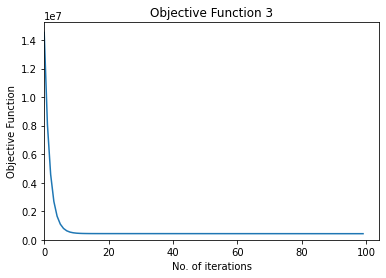

In [45]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

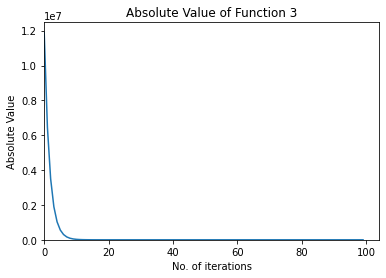

In [46]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

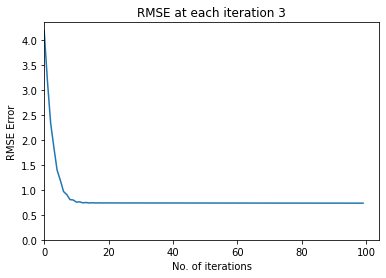

In [47]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### 2. Steplength-Bolddriver as given in lecture slides

In [48]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\winequality-red.csv",delimiter=';')

In [49]:
df1=df[["citric acid","sulphates","alcohol","quality"]]

In [50]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [51]:
X=df_train.iloc[:,0:3]
y=df_train.iloc[:,3:]
X_test=df_test.iloc[:,0:3]
y_test=df_test.iloc[:,3:]
y_test

,quality
0,5
10,5
15,5
17,5
18,4
...,...
1566,6
1569,6
1570,6
1573,6


In [52]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [56]:
def minimise_gd(X,y,beta,imax,epsilon):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        mu=steplength_bolddriver(X,temp,1,0.01,0.01) #If its 0.01 then cost function increases with iterations and for 0.001 it decreases with iterations
        beta=beta_old-(mu*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

def steplength_bolddriver(X,temp,mu_old,stepsize_increase,stepsize_decrease):
    mu=mu_old*stepsize_increase
#     while ((least_square_function(X, y, beta)-least_square_function(X, y, beta-2*mu*temp)).item(0)<=0): #This increases computation time a lot
#         mu=mu*stepsize_decrease 
    if((least_square_function(X, y, beta)>least_square_function(X, y, beta-(1/len(y))*mu*temp)).item(0)):
        return mu*stepsize_increase 
    else:
        return mu*stepsize_decrease
#     return mu

In [57]:
#Here learning rate is not defined
#alpha=0.000001
imax=100
epsilon=0.006
beta=np.zeros([4,1])
beta_old=np.zeros([4,1])
print(np.shape(X))
a,bold,c,d=minimise_gd(X,y,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",bold)
print("Absolute values are",c)
print("RMSE at each step is",d)

(1279, 4)
[[0.]
 [0.]
 [0.]
 [0.]]
[[0.00056247]
 [0.00015459]
 [0.00037165]
 [0.0059008 ]]
[[0.00111871]
 [0.00030749]
 [0.00073922]
 [0.01173601]]
[[0.00166879]
 [0.00045872]
 [0.00110273]
 [0.01750636]]
[[0.00221277]
 [0.00060831]
 [0.00146225]
 [0.02321257]]
[[0.00275073]
 [0.00075626]
 [0.00181781]
 [0.02885536]]
[[0.00328272]
 [0.00090261]
 [0.00216946]
 [0.03443543]]
[[0.00380883]
 [0.00104736]
 [0.00251723]
 [0.03995347]]
[[0.00432911]
 [0.00119053]
 [0.00286119]
 [0.04541018]]
[[0.00484362]
 [0.00133215]
 [0.00320135]
 [0.05080623]]
[[0.00535244]
 [0.00147223]
 [0.00353778]
 [0.05614231]]
[[0.00585562]
 [0.00161078]
 [0.00387051]
 [0.06141908]]
[[0.00635323]
 [0.00174782]
 [0.00419957]
 [0.06663719]]
[[0.00684532]
 [0.00188338]
 [0.00452502]
 [0.0717973 ]]
[[0.00733197]
 [0.00201746]
 [0.00484689]
 [0.07690006]]
[[0.00781323]
 [0.00215008]
 [0.00516523]
 [0.0819461 ]]
[[0.00828916]
 [0.00228126]
 [0.00548006]
 [0.08693605]]
[[0.00875982]
 [0.00241102]
 [0.00579144]
 [0.0918705

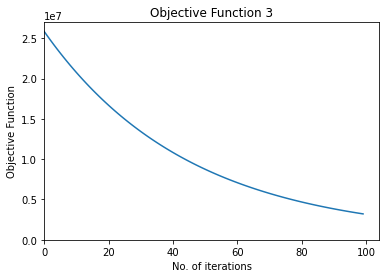

In [58]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(bold,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

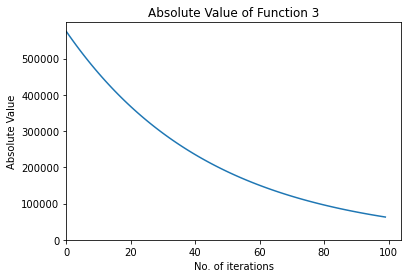

In [59]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

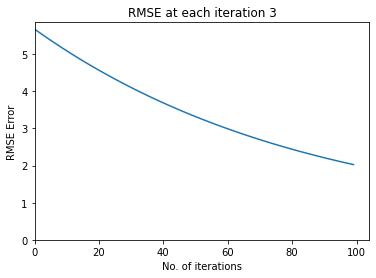

In [60]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### LookAhead Optimiser
Lookahead maintains a set of slow weights φ and fast weights θ, which get synced with the fast weights every k updates.
The fast weights are updated through applying A, any standard optimization algorithm, to batches of training examples sampled from the dataset D. After k inner optimizer updates using A, the slow weights are updated towards the fast weights by linearly interpolating in weight space, θ − φ. We denote the slow weights learning rate as α. After each slow weights update, the fast weights are reset to the current slow weights value

Reference Paper on :Lookahead Optimizer: k steps forward, 1 step back

In [61]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\winequality-red.csv",delimiter=';')

In [62]:
df1=df[["citric acid","sulphates","alcohol","quality"]]

In [63]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [64]:
X=df_train.iloc[:,0:3]
y=df_train.iloc[:,3:]
X_test=df_test.iloc[:,0:3]
y_test=df_test.iloc[:,3:]
y_test

,quality
0,5
10,5
15,5
17,5
18,4
...,...
1566,6
1569,6
1570,6
1573,6


In [65]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [66]:
def lookahead_optimiser(X,y,beta,beta_old,slow_weight,k,slow_weight_stepsize,tmax):
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for t in range (tmax):
        beta=slow_weight
        for i in range(k):
            X_d,y_d=create_minibatch(X,y)
            beta_old=beta
            beta=beta_old+minimise_gd(X_d,y_d,0.0001,beta_old,100)
        slow_weight_old=slow_weight
        slow_weight=slow_weight_old+slow_weight_stepsize*(np.subtract(beta,slow_weight_old))
        J_history.append(least_square_function(X, y, slow_weight))
        abs_value.append(abs(least_square_function(X, y, slow_weight_old)-least_square_function(X, y, slow_weight)))
        rmse_value.append(find_rmse(slow_weight))
    return slow_weight,J_history,abs_value,rmse_value
    
def create_minibatch(X,y):
    x_s = pd.DataFrame(data=X,  columns=["1", "2","3","4"])
    y_s = pd.DataFrame(data=y,  columns=["1"])
    frames=[x_s,y_s]
    final=pd.concat(frames,axis=1,ignore_index=True)
    final=final.sample(frac=0.1,random_state=200)
    X=final.iloc[:,1:4]
    y=final.iloc[:,4:]
    m=len(y)
    X_final = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
    y_final = np.array(y).reshape(-1,1) 
    return X_final,y_final
    
    
    
def minimise_gd(X,y,alpha,beta,imax):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
#         print(beta_old)
        beta=beta_old-(alpha*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta
#,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

In [67]:
alpha=0.000001
imax=100
epsilon=0.006
tmax=100
beta=np.zeros([4,1])
beta_old=np.zeros([4,1])
slow_weight=np.zeros([4,1])
print(np.shape(X))
a,b,c,d=lookahead_optimiser(X,y,beta,beta_old,slow_weight,10,0.00005,tmax)
# a,b,c,d=minimise_gd(X,y,alpha,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(1279, 4)
Final beta value is [[0.02952156]
 [0.03690034]
 [0.0524724 ]
 [0.0866915 ]]
Function values are [26324603.206984982, 26237929.232193734, 26151328.377396967, 26064800.94493233, 25978347.23770065, 25891967.55916197, 25805662.213331264, 25719431.504773892, 25633275.738600735, 25547195.220462956, 25461190.256546523, 25375261.153566297, 25289408.218759768, 25203631.759880368, 25117932.085190438, 25032309.503453646, 24946764.32392706, 24861296.856352635, 24775907.41094827, 24690596.298398264, 24605363.82984323, 24520210.31686946, 24435136.07149757, 24350141.406170595, 24265226.633741308, 24180392.067458864, 24095638.020954683, 24010964.808227517, 23926372.74362769, 23841862.141840436, 23757433.317868374, 23673086.587012965, 23588822.26485494, 23504640.667233735, 23420542.110225733, 23336526.910121407, 23252595.383401196, 23168747.846710097, 23084984.61683098, 23001306.010656405, 22917712.345159058, 22834203.93736064, 22750781.104299087, 22667444.16299424, 22584193.43041165, 225010

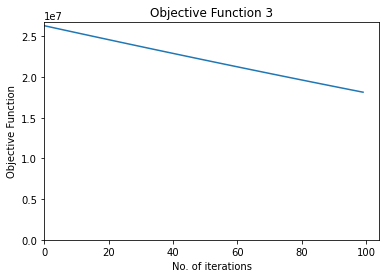

In [68]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

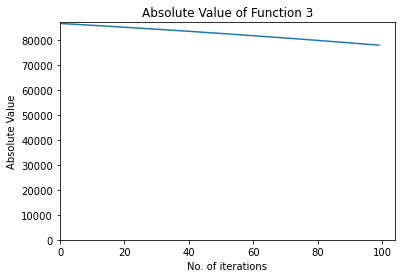

In [69]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

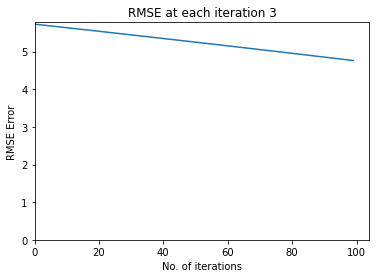

In [70]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### Declare a winning step-length controller based on the metric RMSE. You should tune the associatedhyperparameters of the step-length controller(s).

##### According to the Model, Selected Pararmeters and columns Steplength Bolddriver gives the best RMSE Reduction over iterations

#### References:
 - https://medium.com/nothingaholic/multiple-linear-regression-with-python-22e2087cd628
 - https://www.askpython.com/python/examples/rmse-root-mean-square-error
 - https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
 - https://stackoverflow.com/questions/41181779/merging-2-dataframes-vertically